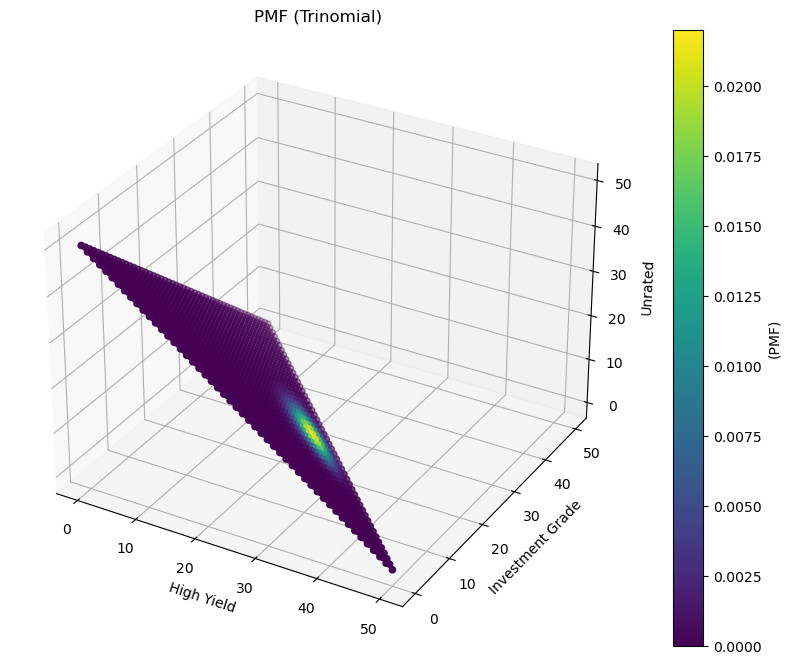

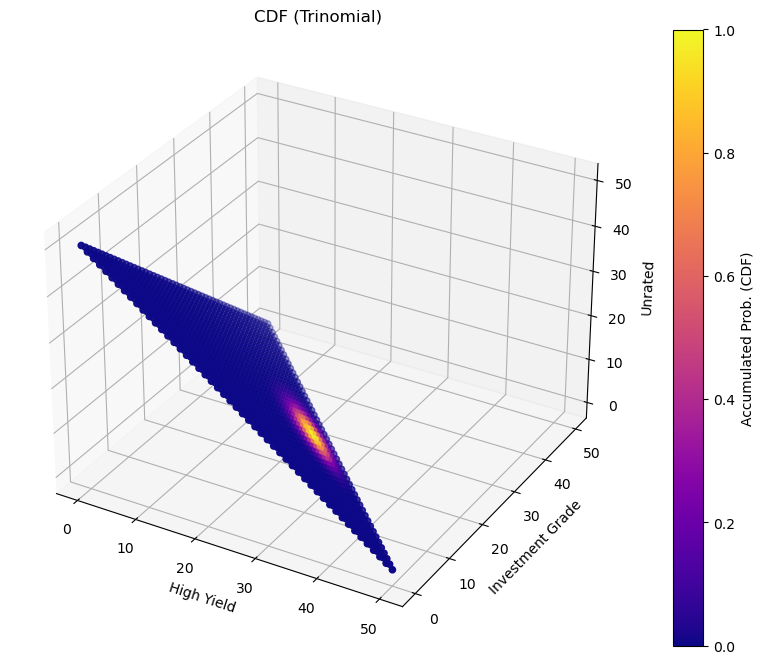

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial




n_bonds = 50  
probs = [0.5, 0.4, 0.1]  # Prob. High Yield, Investment Grade, Unrated

# all combinations:
counts = []
for high_yield in range(n_bonds + 1):
    for investment_grade in range(n_bonds - high_yield + 1):
        unrated = n_bonds - high_yield - investment_grade
        counts.append([high_yield, investment_grade, unrated])
counts = np.array(counts)

# PMF
pmf_values = multinomial.pmf(counts, n_bonds, probs)

# CDF
sorted_indices = np.argsort(pmf_values)
cdf_values = np.cumsum(pmf_values[sorted_indices])


high_yield_counts = counts[:, 0]
investment_grade_counts = counts[:, 1]
unrated_counts = counts[:, 2]


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    high_yield_counts,
    investment_grade_counts,
    unrated_counts,
    c=pmf_values,
    cmap='viridis',
    s=20
)
ax.set_title("PMF (Trinomial)")
ax.set_xlabel("High Yield")
ax.set_ylabel("Investment Grade")
ax.set_zlabel("Unrated")
plt.colorbar(sc, label="(PMF)")
plt.show()

# Crear gráfico en 3D para CDF
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    high_yield_counts[sorted_indices],
    investment_grade_counts[sorted_indices],
    unrated_counts[sorted_indices],
    c=cdf_values,
    cmap='plasma',
    s=20)

ax.set_title("CDF (Trinomial)")
ax.set_xlabel("High Yield")
ax.set_ylabel("Investment Grade")
ax.set_zlabel("Unrated")
plt.colorbar(sc, label="Accumulated Prob. (CDF)")
plt.show()

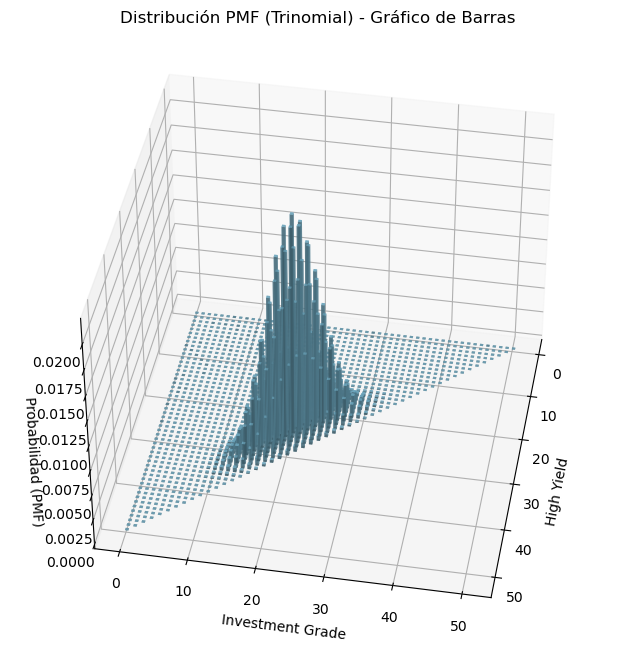

In [3]:


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


ax.bar3d(
    high_yield_counts,
    investment_grade_counts,
    np.zeros_like(pmf_values), 
    dx=0.5, 
    dy=0.5, 
    dz=pmf_values, 
    color='skyblue',
    alpha=0.7 )
ax.view_init(elev=40, azim=10)

ax.set_title("Distribución PMF (Trinomial) - Gráfico de Barras")
ax.set_xlabel("High Yield")
ax.set_ylabel("Investment Grade")
ax.set_zlabel("Probabilidad (PMF)")
plt.show()


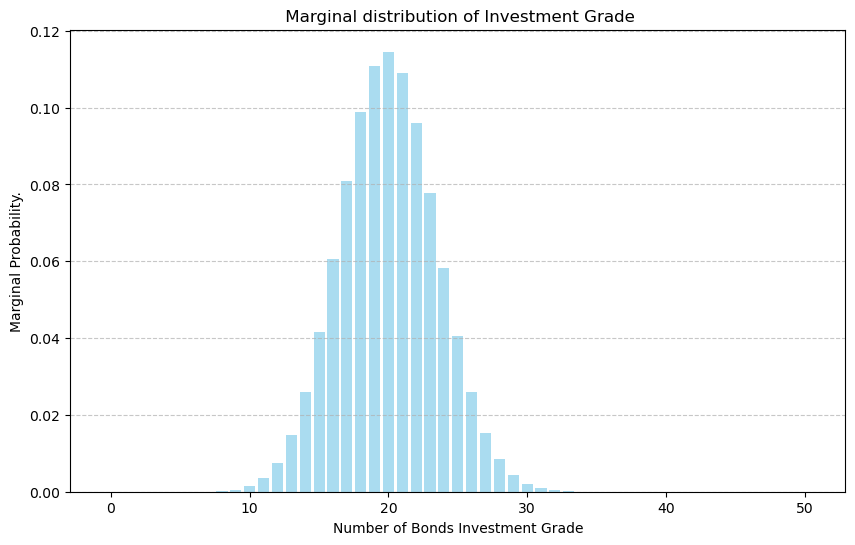

In [5]:

investment_grade_marginal = np.zeros(n_bonds + 1)

for ig_count in range(n_bonds + 1):  
    for high_yield in range(n_bonds - ig_count + 1):  
        unrated = n_bonds - high_yield - ig_count  
        if unrated >= 0:  
            prob = multinomial.pmf([high_yield, ig_count, unrated], n_bonds, probs)
            investment_grade_marginal[ig_count] += prob


plt.figure(figsize=(10, 6))
plt.bar(range(n_bonds + 1), investment_grade_marginal, color="skyblue", alpha=0.7)
plt.title(" Marginal distribution of Investment Grade")
plt.xlabel("Number of Bonds Investment Grade")
plt.ylabel("Marginal Probability.")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### The specific marginal probability:

In [7]:

k = 40  


marginal_prob = 0
for high_yield in range(n_bonds - k + 1):  
    unrated = n_bonds - high_yield - k  
    if unrated >= 0:  
        prob = multinomial.pmf([high_yield, k, unrated], n_bonds, probs)
        marginal_prob += prob

print(f" The Marginal prob. for {k} bonds in Investment Grade is: {marginal_prob:.6f}")

 The Marginal prob. for 40 bonds in Investment Grade is: 0.000000


## Relationship: variance and correlation for 2 asstes ( sum of variance)

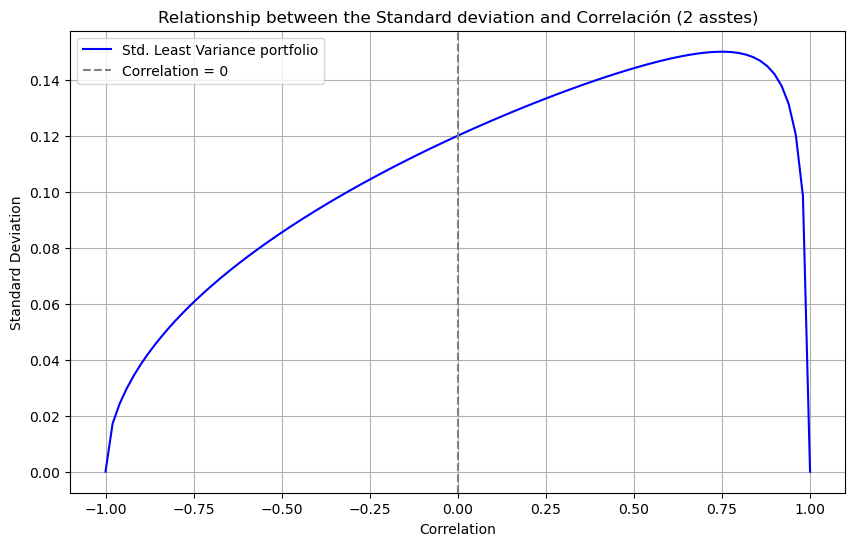

In [8]:
import numpy as np
import matplotlib.pyplot as plt


sigma1 = 0.15  
sigma2 = 0.20  
correlations = np.linspace(-1, 1, 100)  

std_cartera = []
for rho in correlations:
    w1 = (sigma2**2 - rho * sigma1 * sigma2) / (sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    w2 = 1 - w1
    var_cartera = w1**2 * sigma1**2 + w2**2 * sigma2**2 + 2 * w1 * w2 * rho * sigma1 * sigma2
    std_cartera.append(np.sqrt(var_cartera))


plt.figure(figsize=(10, 6))
plt.plot(correlations, std_cartera, label="Std. Least Variance portfolio", color='blue')
plt.title("Relationship between the Standard deviation and Correlación (2 asstes)")
plt.xlabel("Correlation")
plt.ylabel("Standard Deviation")
plt.axvline(0, color='gray', linestyle='--', label="Correlation = 0")
plt.legend()
plt.grid()
plt.show()

For a portfolio with two assets, we use the analytical formula to find the weights of the minimum variance portfolio:
$
w_1 = \frac{\sigma_2^2 - \rho \sigma_1 \sigma_2}{\sigma_1^2 + \sigma_2^2 - 2 \rho \sigma_1 \sigma_2}, \quad w_2 = 1 - w_1
$
where ($\sigma_1$) and ($\sigma_2$) are the standard deviations of the assets, and ($\rho$) is the correlation between them. We calculate the portfolio variance and plot the relationship between standard deviation and correlation.

## Relationship: variance and correlation for 3 asstes ( sum of variance)

For a portfolio with three assets, we use numerical optimization to minimize the portfolio variance:
$
\text{Var}(\text{Portfolio}) = w^T \Sigma w, \quad \text{subject to} \quad \sum_i w_i = 1 \quad \text{and} \quad w_i \geq 0
$
where ($\Sigma$) is the covariance matrix. We plot how the minimum standard deviation changes with different correlations between assets.

/var/folders/m9/c9589kt55s97pv2_7d68bl380000gn/T/ipykernel_1611/2222520323.py:44: RuntimeWarning: invalid value encountered in sqrt
  std_min_var[i, j] = np.sqrt(min_var)


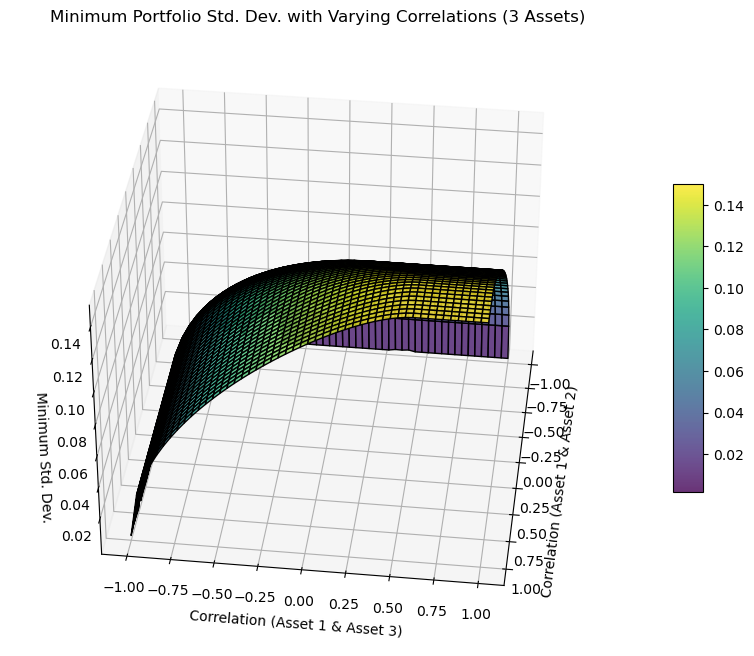

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

sigma = np.array([0.15, 0.20, 0.25])  
corr_matrix = np.array([[1.0, 0.0, 0.0], 
                        [0.0, 1.0, 0.4], 
                        [0.0, 0.4, 1.0]])  
cov_matrix = np.outer(sigma, sigma) * corr_matrix  


def portfolio_variance(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights


constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})


bounds = [(0, 1) for _ in range(len(sigma))]


initial_weights = np.array([1/3, 1/3, 1/3])


correlations_12 = np.linspace(-1, 1, 50)
correlations_13 = np.linspace(-1, 1, 50)


std_min_var = np.zeros((len(correlations_12), len(correlations_13)))


for i, rho_12 in enumerate(correlations_12):
    for j, rho_13 in enumerate(correlations_13):
       
        corr_matrix[0, 1] = rho_12
        corr_matrix[1, 0] = rho_12
        corr_matrix[0, 2] = rho_13
        corr_matrix[2, 0] = rho_13
        cov_matrix = np.outer(sigma, sigma) * corr_matrix
        
        
        result = minimize(portfolio_variance, initial_weights, args=(cov_matrix,), constraints=constraints, bounds=bounds)
        min_var = portfolio_variance(result.x, cov_matrix)
        std_min_var[i, j] = np.sqrt(min_var)


from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(correlations_12, correlations_13)
Z = std_min_var.T

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)
ax.set_title("Minimum Portfolio Std. Dev. with Varying Correlations (3 Assets)")
ax.set_xlabel("Correlation (Asset 1 & Asset 2)")
ax.set_ylabel("Correlation (Asset 1 & Asset 3)")
ax.set_zlabel("Minimum Std. Dev.")
ax.view_init(elev=35, azim=7)
# Color Bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()

## Explanation of the above code:


Explicación del Código

Este código calcula la desviación estándar mínima de una cartera con 3 activos, explorando cómo las correlaciones entre los activos afectan el riesgo de la cartera. A continuación, se explica cada sección:

1. Parámetros Iniciales

sigma = np.array([0.15, 0.20, 0.25])  # Desviaciones estándar
corr_matrix = np.array([[1.0, 0.0, 0.0], 
                        [0.0, 1.0, 0.4], 
                        [0.0, 0.4, 1.0]])  # Matriz de correlación inicial
cov_matrix = np.outer(sigma, sigma) * corr_matrix  # Matriz de covarianza

	•	sigma: Vector que contiene las desviaciones estándar de los tres activos.
	•	corr_matrix: Matriz inicial de correlaciones entre los activos. Los valores de correlación ￼ y ￼ se ajustarán más adelante.
	•	cov_matrix: Matriz de covarianza, calculada combinando las desviaciones estándar y las correlaciones.

2. Función Objetivo: Minimizar la Varianza

def portfolio_variance(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

	•	Objetivo: Minimizar la varianza de la cartera. Matemáticamente:
￼
	•	Parámetros:
	•	weights: Ponderaciones de los activos.
	•	cov_matrix: Matriz de covarianza.

3. Restricciones y Límites

constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = [(0, 1) for _ in range(len(sigma))]
initial_weights = np.array([1/3, 1/3, 1/3])

	•	Restricción de suma: La suma de las ponderaciones debe ser 1 (￼), lo que asegura una cartera válida.
	•	Restricción de ventas en corto: Las ponderaciones deben estar entre 0 y 1 (￼).
	•	Ponderaciones iniciales: Comenzamos con una cartera equitativa (￼).

4. Matrices de Correlación Variables

correlations_12 = np.linspace(-1, 1, 50)
correlations_13 = np.linspace(-1, 1, 50)
std_min_var = np.zeros((len(correlations_12), len(correlations_13)))

	•	correlations_12 y correlations_13: Generan valores de correlación entre los pares de activos:
	•	￼: Correlación entre los activos 1 y 2.
	•	￼: Correlación entre los activos 1 y 3.
	•	std_min_var: Matriz vacía para almacenar las desviaciones estándar mínimas calculadas.

5. Calcular la Desviación Estándar Mínima

for i, rho_12 in enumerate(correlations_12):
    for j, rho_13 in enumerate(correlations_13):
        corr_matrix[0, 1] = rho_12
        corr_matrix[1, 0] = rho_12
        corr_matrix[0, 2] = rho_13
        corr_matrix[2, 0] = rho_13
        cov_matrix = np.outer(sigma, sigma) * corr_matrix
        
        result = minimize(portfolio_variance, initial_weights, args=(cov_matrix,), constraints=constraints, bounds=bounds)
        min_var = portfolio_variance(result.x, cov_matrix)
        std_min_var[i, j] = np.sqrt(min_var)

	•	Bucle doble: Itera sobre todas las combinaciones de ￼ y ￼.
	•	Actualizar correlaciones: Modifica los valores de ￼ y ￼ en la matriz de correlación.
	•	Optimización: Para cada combinación, minimiza la varianza de la cartera y obtiene las ponderaciones óptimas.
	•	Guardar resultados: Calcula la desviación estándar (￼) y la almacena en std_min_var.

6. Gráfica 3D

X, Y = np.meshgrid(correlations_12, correlations_13)
Z = std_min_var.T

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)
ax.set_title("Minimum Portfolio Std. Dev. with Varying Correlations (3 Assets)")
ax.set_xlabel("Correlation (Asset 1 & Asset 2)")
ax.set_ylabel("Correlation (Asset 1 & Asset 3)")
ax.set_zlabel("Minimum Std. Dev.")
ax.view_init(elev=35, azim=7)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()

	•	Crear malla (grid): X y Y contienen las correlaciones ￼ y ￼, y Z contiene las desviaciones estándar mínimas calculadas.
	•	Superficie 3D: Se utiliza plot_surface para graficar cómo cambian las desviaciones estándar con las correlaciones.
	•	Etiquetas de ejes:
	•	￼: Correlación entre los activos 1 y 2 (￼).
	•	￼: Correlación entre los activos 1 y 3 (￼).
	•	￼: Desviación estándar mínima.
	•	Personalización: La vista del gráfico se ajusta con view_init.

Resultados Esperados
	•	La desviación estándar mínima disminuye cuando las correlaciones son bajas o negativas debido a los beneficios de la diversificación.
	•	A medida que las correlaciones se acercan a 1, la diversificación es menos efectiva, aumentando el riesgo de la cartera.

Cómo Adaptar Este Código
	1.	Cambiar parámetros:
	•	Ajusta las desviaciones estándar (sigma) o las correlaciones iniciales (corr_matrix) para trabajar con otros activos.
	2.	Agregar activos:
	•	Extiende sigma y corr_matrix para incluir más activos.
	3.	Más restricciones:
	•	Añade restricciones adicionales en la optimización (por ejemplo, límites en las ponderaciones).


In [105]:
# Ejemplo de caso financiero: Por ejemplo, si se usan X1 y X2 como tasas de retorno en dos activos
# independientes seleccionados al azar dentro de un rango normalizado de 0 a 1.

# --- Independencia Condicional: Caso Discreto ---
# Variables discretas simuladas
from collections import Counter


import numpy as np
from collections import Counter

# Generar muestras aleatorias para X1, X2 y Z
np.random.seed(42)  # Semilla para reproducibilidad
n_samples = 10000
x1_vals = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])
x2_vals = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])
z_vals = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])

# Calcular distribuciones conjuntas
joint_x1_z = Counter(zip(x1_vals, z_vals))  # Conjunto de (X1, Z)
joint_x2_z = Counter(zip(x2_vals, z_vals))  # Conjunto de (X2, Z)
joint_all = Counter(zip(x1_vals, x2_vals, z_vals))  # Conjunto de (X1, X2, Z)

# Función para calcular la probabilidad condicional
def conditional_probability(joint, z_value, given_values):
    # Contar cuántas claves tienen el valor Z=z_value
    given_count = sum(v for k, v in joint.items() if k[-1] == z_value)
    
    # Evitar división por cero
    if given_count == 0:
        return 0

    # Calcular probabilidad condicional
    prob = sum(v for k, v in joint.items() if k[-1] == z_value and k[:-1] == given_values) / given_count
    return prob

# Probabilidad condicional P(X1=1, X2=1 | Z=1)
z_value = 1
p_x1_x2_given_z = conditional_probability(joint_all, z_value, (1, 1))
p_x1_given_z = conditional_probability(joint_x1_z, z_value, (1,))
p_x2_given_z = conditional_probability(joint_x2_z, z_value, (1,))

# Verificar independencia condicional
print(f"P(X1=1, X2=1 | Z=1) = {round(p_x1_x2_given_z,3)}")
print(f"P(X1=1 | Z=1) * P(X2=1 | Z=1) = {round(p_x1_given_z * p_x2_given_z,3)}")

P(X1=1, X2=1 | Z=1) = 0.244
P(X1=1 | Z=1) * P(X2=1 | Z=1) = 0.243


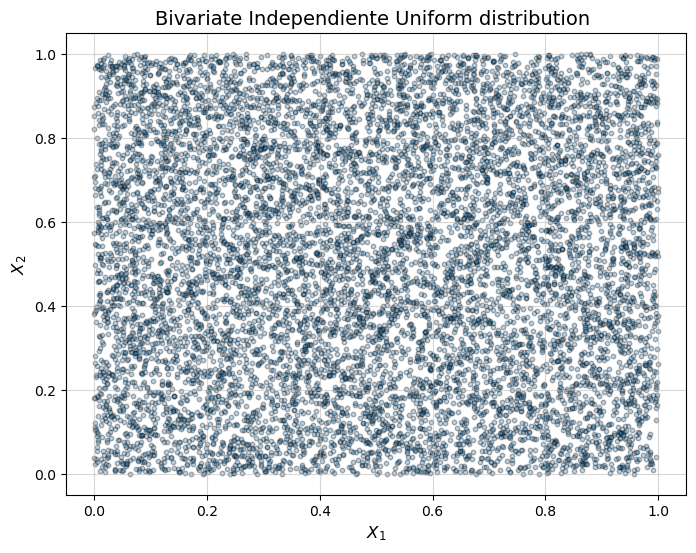

In [10]:
# Uso de una Distribución Bivariada Uniforme Independiente
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)  
n_samples = 10000  
x1 = np.random.uniform(0, 1, n_samples)  
x2 = np.random.uniform(0, 1, n_samples)  


plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, alpha=0.3, edgecolor='k', s=10)
plt.title('Bivariate Independiente Uniform distribution ', fontsize=14)
plt.xlabel('$X_1$', fontsize=12)
plt.ylabel('$X_2$', fontsize=12)
plt.grid(alpha=0.5)
plt.show()


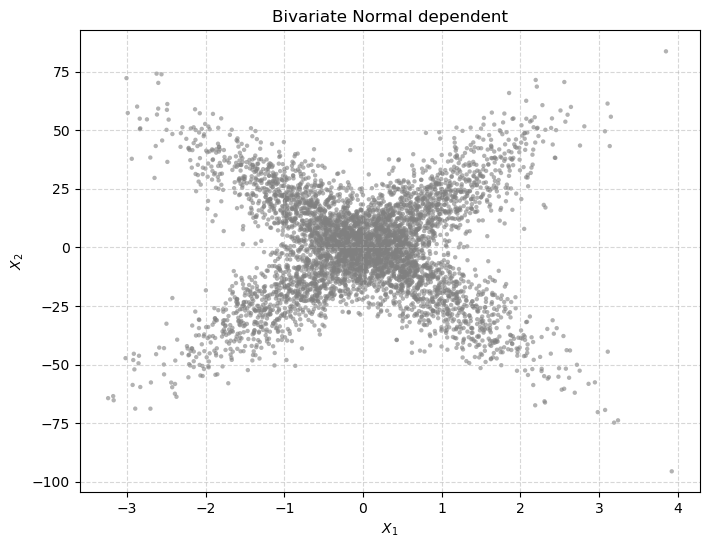

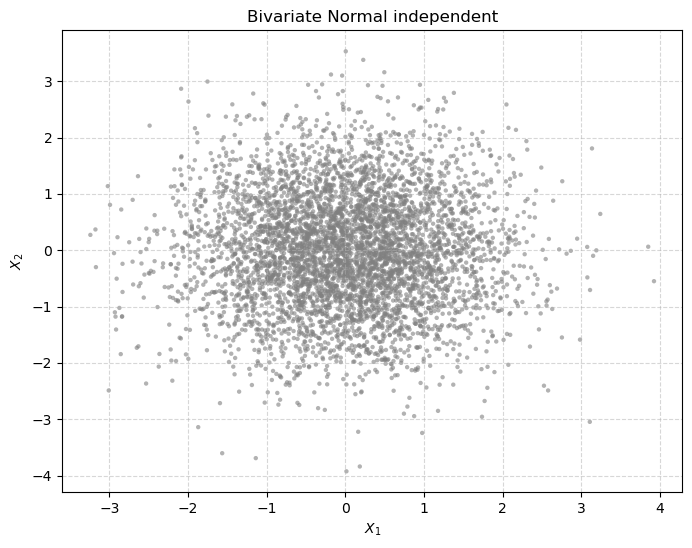

In [11]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)  
N = 5000  


X1 = np.random.normal(0, 1, N)
X3 = np.random.normal(0, 1, N)
X2 = abs(X1) * np.random.choice([-20, 20], size=N) + np.random.normal(0, 10, N)

plt.figure(figsize=(8, 6))
plt.scatter(X1, X2, color='gray', alpha=0.6, edgecolor='none', s=10)
plt.title("Bivariate Normal dependent")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X1, X3, color='gray', alpha=0.6, edgecolor='none', s=10)
plt.title("Bivariate Normal independent")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

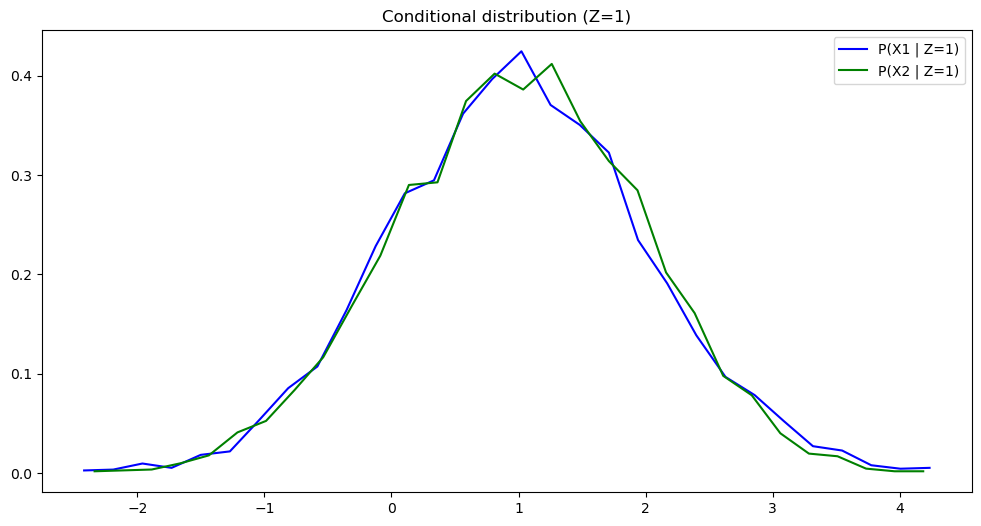

In [12]:

# --- Independencia Condicional: Caso Continuo ---
from scipy.stats import norm


z_vals_cont = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])
x1_cont = np.random.normal(loc=z_vals_cont, scale=1, size=n_samples)  
x2_cont = np.random.normal(loc=z_vals_cont, scale=1, size=n_samples)  


# Verificar independencia condicional
# P(X1, X2 | Z) debería aproximarse a P(X1 | Z) * P(X2 | Z)
# Estimar P(X1, X2 | Z=1) vs P(X1 | Z=1) * P(X2 | Z=1)

z_value_cont = 1
x1_z1 = x1_cont[z_vals_cont == z_value_cont]
x2_z1 = x2_cont[z_vals_cont == z_value_cont]


joint_density, x_edges, _ = np.histogram2d(x1_z1, x2_z1, bins=30, density=True)
x1_density, x_edges1 = np.histogram(x1_z1, bins=30, density=True)
x2_density, x_edges2 = np.histogram(x2_z1, bins=30, density=True)


centre1 = (x_edges1[:-1] + x_edges1[1:]) / 2
centre2 = (x_edges2[:-1] + x_edges2[1:]) / 2
plt.figure(figsize=(12, 6))
plt.plot(centre1,x1_density, label='P(X1 | Z=1)', color='blue')
plt.plot(centre2,x2_density, label='P(X2 | Z=1)', color='green')
plt.legend()
plt.title('Conditional distribution (Z=1)')
plt.show()

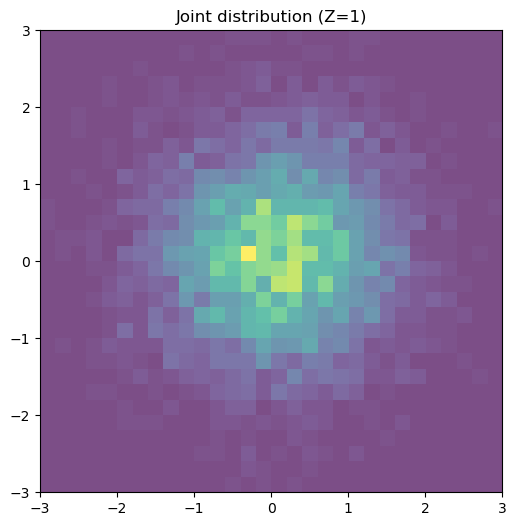

In [13]:
plt.figure(figsize=(15, 6))

plt.imshow(joint_density, extent=[-3, 3, -3, 3], origin='lower', cmap='viridis', alpha=0.7)
plt.title('Joint distribution (Z=1)')
plt.show()

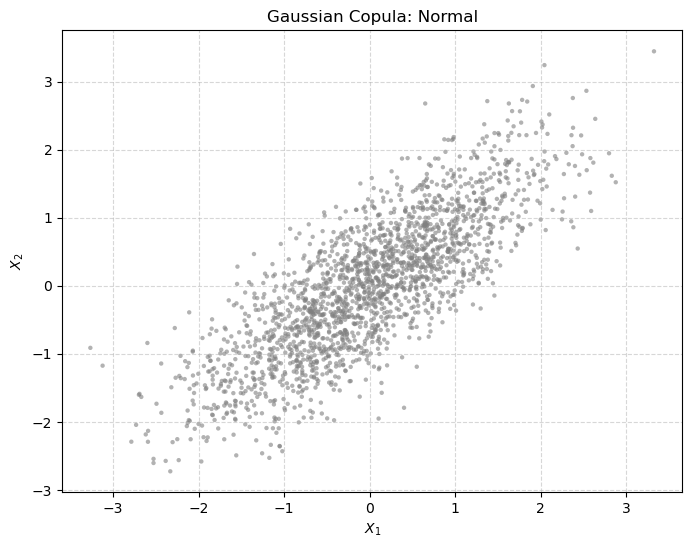

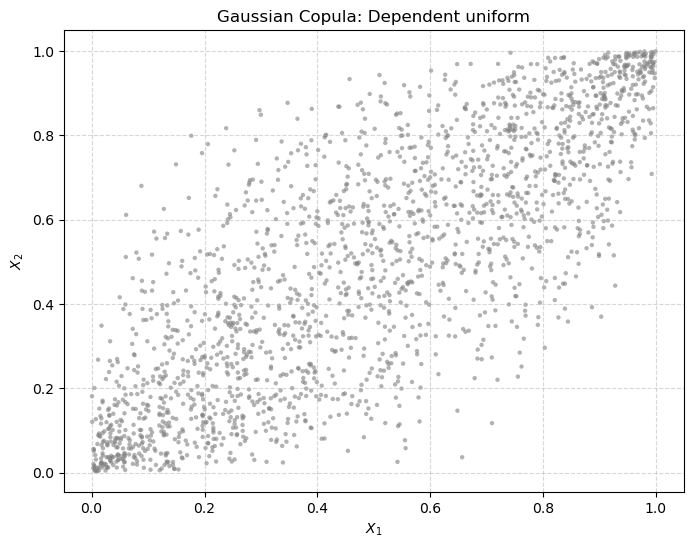

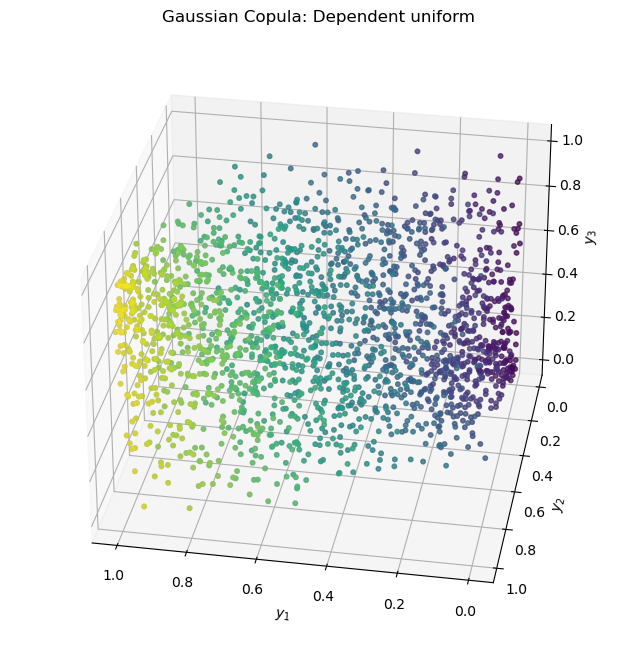

In [305]:
#Correlating thre unkown distributions using copulas:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

np.random.seed(42)
N = 2000  # Número de puntos
rho12, rho13, rho23 = 0.8, 0.5, 0.3
R = np.array([[1, rho12, rho13],
              [rho12, 1, rho23],
              [rho13, rho23, 1]])

u1 = np.random.uniform(0,1,N)
u2 = np.random.uniform(0,1,N)
u3 = np.random.uniform(0,1,N)

L = np.linalg.cholesky(R)

u = np.array([u1,u2,u3]).T
#n.shape
n = u
for j in range(3):
    for i in range(N):
        n[i,j] = norm.ppf(u[i,j])
correlated_n = n @ L.T
x1 = correlated_n[:,0]
x2 = correlated_n[:,1]
x3 = correlated_n[:,2]

uniform_corr = norm.cdf(correlated_n)
y1 = uniform_corr[:,0]
y2 = uniform_corr[:,1]
y3 = uniform_corr[:,2]


from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(8, 6))
plt.scatter(x2, x1, color='gray', alpha=0.6, edgecolor='none', s=10)
plt.title("Gaussian Copula: Normal")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y2, y1, color='gray', alpha=0.6, edgecolor='none', s=10)
plt.title("Gaussian Copula: Dependent uniform")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D
ax.scatter(y1, y2, y3, color='gray', alpha=0.6, s=10)

# Configuración de ejes
ax.set_title("Gaussian Copula: Dependent uniform")
ax.set_xlabel("$y_1$")
ax.set_ylabel("$y_2$")
ax.set_zlabel("$y_3$")
ax.scatter(y1, y2, y3, c=y1+y2, cmap='viridis', alpha=0.6, s=10)
ax.view_init(elev=30, azim=100)  # Ángulo de elevación y rotación
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t


np.random.seed(42)
N = 2000  
rho = -0.9  


correlation_matrix = np.array([[1, rho], [rho, 1]])


L = np.linalg.cholesky(correlation_matrix)  
z = np.random.normal(size=(N, 2))  
z_corr = z @ L.T  


u = norm.cdf(z_corr[:, 0]) 
v = norm.cdf(z_corr[:, 1])  


X1 = norm.ppf(u) 
X2 = abs(X1) * np.random.choice([-20, 20], size=N) + np.random.normal(0, 10, N)


plt.figure(figsize=(8, 6))
plt.scatter(X1, X2, color='gray', alpha=0.6, edgecolor='none', s=10)
plt.title("Scatter Plot with Gaussian Copula")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()